In [12]:
import os
import skimage
from skimage.color import rgb2gray
import matplotlib.pyplot as plt 
from random import randrange
import numpy as np
import tensorflow as tf

In [2]:
##Pega as imagens nas pastas Testing e Training e colocam em duas listas
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.io.imread(f))
            labels.append(int(d))
    return images, labels

ROOT_PATH_TRAINING = "D:/Desenvolvimento/Versão antiga/teste/TensorFlow/Training"
ROOT_PATH_TESTING = "D:/Desenvolvimento/Versão antiga/teste/TensorFlow/Testing"

images, labels = load_data(ROOT_PATH_TRAINING)

In [3]:
##tamanho da lista, ou seja, quantidade de imagens
images.__len__()

4575

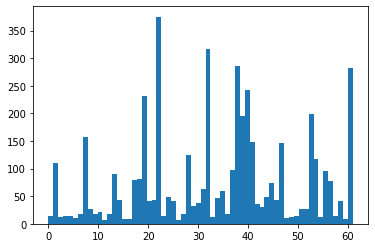

In [3]:
##Quantidade de imagens em cada um dos labels
plt.hist(labels, 62)

plt.show()

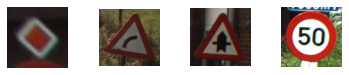

In [4]:
##pega quanto imagens aleatorias para visualização
traffic_signs = [randrange(4575), randrange(4575), randrange(4575), randrange(4575)]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

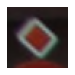

shape: (42, 42, 3), min: 12, max: 162


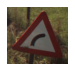

shape: (224, 239, 3), min: 9, max: 255


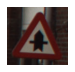

shape: (112, 118, 3), min: 1, max: 191


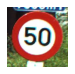

shape: (119, 121, 3), min: 0, max: 255


In [5]:
## pega o tamanho das imagens geradas aleatorias no bloco anterior
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))

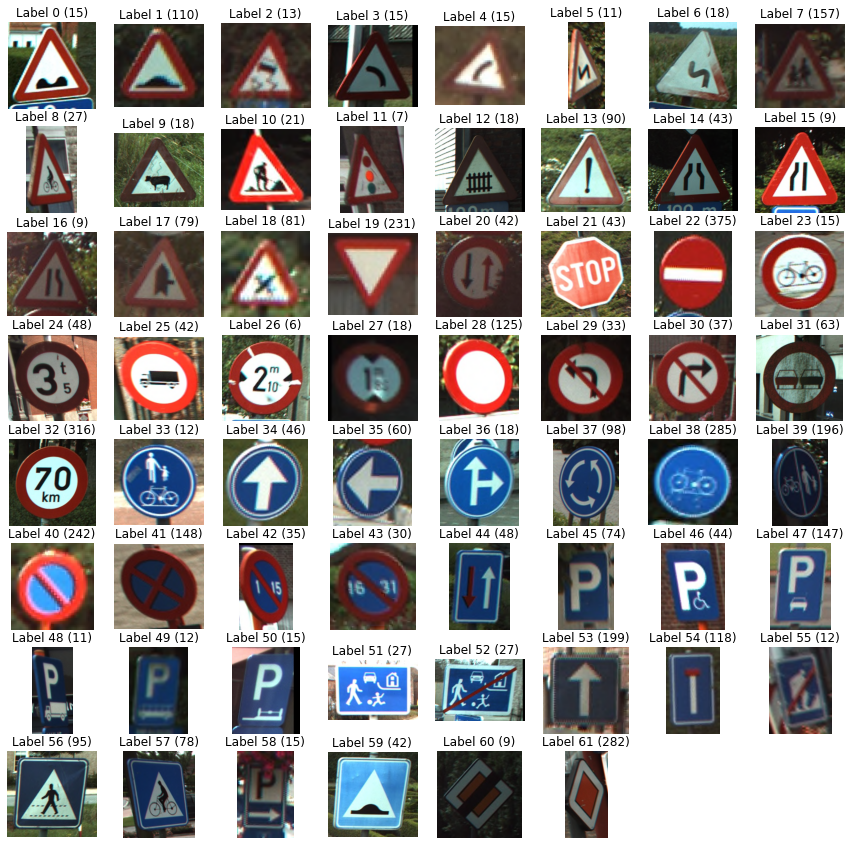

In [6]:
##Pega a primeira imagem de cada label

# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, labels.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

In [7]:
##Muda o formato das imagens para um 28x28
images28 = [skimage.transform.resize(image, (28, 28)) for image in images]
images28 = np.array(images28)

# Convert `images28` to grayscale
images28 = rgb2gray(images28)


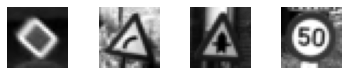

In [8]:
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)

In [14]:
##Erro, nn funciona na versão 2.0
x = tf.compat.v1.placeholder(dtype = tf.float32, shape = [None, 28, 28])
y = tf.compat.v1.placeholder(dtype = tf.int32, shape = [None])

# Flatten the input data
images_flat = tf.contrib.layers.flatten(x)

# Fully connected layer 
logits = tf.contrib.layers.fully_connected(images_flat, 62, tf.nn.relu)

# Define a loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, 
                                                                    logits = logits))
# Define an optimizer 
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# Convert logits to label indexes
correct_pred = tf.argmax(logits, 1)

# Define an accuracy metric
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

AttributeError: module 'tensorflow.compat.v1' has no attribute 'contrib'